<h2>ALY6015_SpringA2020_Pragati_Koladiya_Assignment</h2>
<p> <b>Tittle:</b> Red Wine Quality Prediction</p>

<h3><b>Introduction</b></h3> 

<p>My goal in this assignment is to compare several classification algorithms to predict wine quality, ranging score between 0 to 10. My work will compare and select an algorithm to find out what makes a good wine by using "<i>winequality-red.csv</i>".</p>
<p><i><b>Reserch Question: </b>By comparing several models, identify the wine quality as good or bad?</i></p> 
<p><i>Data sourced</i> from kaggle's below link,</p>
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/kernels?sortBy=relevance&group=everyone&search=ve&page=1&pageSize=20&datasetId=4458

<h2><b>Dataset Information</b></h2>
<p>The data is about red wine samples (vinho verde) from Portugal. The data was collected from May 2004 to February 2007</p>

<p>The data contains 1599 observations (wine samples) and 12 attributes or variables related to the wine. The 12 attributes and a description of each variable (attribute) are provided below with title "Dataset Information"</p>

<h2><b>Data Exploration</b></h2>
<ul>
  <li>Checking null values</li>
  <li>Observing datatypes and unique values</li>
  <li>Identify independent and dependent varables</li>
</ul>

<h2><b>Exploratory Data Analysis (EDA)</b></h2>

<p>Exploratory data analysis is a very important step to get an idea of what the dataset is like and what kind of modifications we need to make.
</p>

<h2><b>Preprocessing</b></h2>
<ul>
    <li>Checking missing values</li>
    <li>Dropping columns</li>
    <li>Removing Outliers</li>
    <li>Principle Component Analysis (PCA)</li>
    <li>Final arrangements before model comparison</li>
</ul>

<h2><b>Models Implemented</b></h2>
<ul>
    <li>Logistic Regression</li>
    <li>Random Forest</li>
    <li>Decision Tree</li>
    <li>KNN Classifier</li>
</ul>

<h2><b>Testing Model</b></h2>
<ul>
  <li>Using excel dummy data</li>
    <ul>
      <li>Dummy data is generated using excel function called '<i>RANDBETWEEN</i>'</li>
      <li>Predicted quality of red wine using the best accuracy model</li>
    </ul>
  <li>Using single row dummy data</li>
  <ul>
    <li>Input of dummy values</li>
    <li>Used all model individually for predicting the quality of red wine</li>
    <li>Overall Observation</li>
  </ul>
</ul>

<h2><b>Implementation of professor's feedback</b></h2>

<h2><b>Conclusion</b></h2>
<h2><b>References & links</b></h2>

<h2>Importing Libraries and Modules</h2>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter

import numpy as np

import os

import pandas as pd
from pylab import rcParams
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

import random

import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn import metrics
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score,make_scorer,classification_report,roc_curve,auc
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



<h2>Reading the data</h2>

In [2]:
Data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQd49s9OCoWZ_NTCfxP9ytOTctVIr-TVaGIox2O6WQKEmvnBfJxpmw4uNeiF_z5xq8ylNC4FFE2-9rQ/pub?gid=921900696&single=true&output=csv"
original_data = pd.read_csv(Data_path)
original_data.shape

(1599, 12)

In [3]:
#Viewing head of the dataset
original_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Viewing tail of the dataset
original_data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


<h2>Dataset Information</h2>
<p> 
  <i> Red Wine Quality 
  </i>
</p>
<ol style="list-style-type:squre;">
     <li><b>fixed acidity</b> - Most acids involved with wine or fixed or nonvolatile(do not evaporate readily)</li>
     <li><b>volatile acidity</b> - The amount of acetic acid in wine, which at too high of levels can lead to an unplesant, vinegar taste</li>
     <li><b>citric acid</b> - Found in small quantities, citric acid can add 'freshness' and flavour to wines</li>
     <li><b>residual sugar</b> - The amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter. Wines with greater than 45 grams/litter are considered sweet</li>
     <li><b>chlorides</b> - The amount of salt in the wine</li>
     <li><b>free sulfur dioxide</b> - The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine</li>
     <li><b>total sulfur dioxide</b>- Amount of free and bound form of SO2; in low concentrations, SO2 is mostly undetectable in wine,but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine</li>
     <li><b>density</b> - The wine density</li>
     <li><b>pH</b> - Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale</li>
     <li><b>sulphates</b> - A wine additive which can contribute to sulfur dioxide gas (S02) levels, which acts as an antimicrobial and antioxidant</li>
     <li><b>alcohol</b> - The percent alcohol content of the wine</li>
     <li><b>quality </b>- output variable (based on sensory data, score between 0 and 10) 
    </li>
</ol>

<p> All the measurements are (in grams) per decimeter cubed of wine (dm^3)<b> [g/dm^3] </b>accept <i>pH, alcohol and quality columns</i></p>

<h2>Data Exploration</h2>

In [0]:
#Coping original dataset to new dataframe called 'df'
df = original_data.copy()

In [6]:
#checking datatypes
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

- The describe() takes into account the measures of central tendecies to give an in depth numeric idea of all the attributes of the dataset.

In [7]:
#let's look at the summary of the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


- Using isnull().sum() function we extract the count of total number of null entries in each attribute.

In [8]:
#checking null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

=> After executing the above function we get to know that none of the attributes comprise of any null entries.

- Rename the attributes so as to remove the blank space between them

In [0]:
#Renaming columns to replace white space with underscore
#mainly 6 columns were renamed because of white space
df = df.rename(columns={'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'citric acid':'citric_acid','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide',})



In [10]:
#listing the columns with updated names
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

- The count() function is use to display the total values stored in each column.

In [11]:
df.count()

fixed_acidity           1599
volatile_acidity        1599
citric_acid             1599
residual_sugar          1599
chlorides               1599
free_sulfur_dioxide     1599
total_sulfur_dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

=> Each column has equal value count

- The unique() function provides all the unique values in quality attribute of the dataset

In [12]:
#lets identify the unique value of our dependent variable "Quality"
#(As our goal is to identigy the quality of wine based on other features)
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [13]:
df['quality'].value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

=> Most of the quality raiting are scattered between 5 to 7 

In [14]:
df['fixed_acidity'].unique()

array([ 7.4,  7.8, 11.2,  7.9,  7.3,  7.5,  6.7,  5.6,  8.9,  8.5,  8.1,
        7.6,  6.9,  6.3,  7.1,  8.3,  5.2,  5.7,  8.8,  6.8,  4.6,  7.7,
        8.7,  6.4,  6.6,  8.6, 10.2,  7. ,  7.2,  9.3,  8. ,  9.7,  6.2,
        5. ,  4.7,  8.4, 10.1,  9.4,  9. ,  8.2,  6.1,  5.8,  9.2, 11.5,
        5.4,  9.6, 12.8, 11. , 11.6, 12. , 15. , 10.8, 11.1, 10. , 12.5,
       11.8, 10.9, 10.3, 11.4,  9.9, 10.4, 13.3, 10.6,  9.8, 13.4, 10.7,
       11.9, 12.4, 12.2, 13.8,  9.1, 13.5, 10.5, 12.6, 14. , 13.7,  9.5,
       12.7, 12.3, 15.6,  5.3, 11.3, 13. ,  6.5, 12.9, 14.3, 15.5, 11.7,
       13.2, 15.9, 12.1,  5.1,  4.9,  5.9,  6. ,  5.5])

In [15]:
df['residual_sugar'].unique()

array([ 1.9 ,  2.6 ,  2.3 ,  1.8 ,  1.6 ,  1.2 ,  2.  ,  6.1 ,  3.8 ,
        3.9 ,  1.7 ,  4.4 ,  2.4 ,  1.4 ,  2.5 , 10.7 ,  5.5 ,  2.1 ,
        1.5 ,  5.9 ,  2.8 ,  2.2 ,  3.  ,  3.4 ,  5.1 ,  4.65,  1.3 ,
        7.3 ,  7.2 ,  2.9 ,  2.7 ,  5.6 ,  3.1 ,  3.2 ,  3.3 ,  3.6 ,
        4.  ,  7.  ,  6.4 ,  3.5 , 11.  ,  3.65,  4.5 ,  4.8 ,  2.95,
        5.8 ,  6.2 ,  4.2 ,  7.9 ,  3.7 ,  6.7 ,  6.6 ,  2.15,  5.2 ,
        2.55, 15.5 ,  4.1 ,  8.3 ,  6.55,  4.6 ,  4.3 ,  5.15,  6.3 ,
        6.  ,  8.6 ,  7.5 ,  2.25,  4.25,  2.85,  3.45,  2.35,  2.65,
        9.  ,  8.8 ,  5.  ,  1.65,  2.05,  0.9 ,  8.9 ,  8.1 ,  4.7 ,
        1.75,  7.8 , 12.9 , 13.4 ,  5.4 , 15.4 ,  3.75, 13.8 ,  5.7 ,
       13.9 ])

In [16]:
df['free_sulfur_dioxide'].unique()

array([11. , 25. , 15. , 17. , 13. ,  9. , 16. , 52. , 51. , 35. ,  6. ,
       29. , 23. , 10. , 21. ,  4. , 14. ,  8. , 22. , 40. ,  5. ,  3. ,
        7. , 12. , 30. , 33. , 50. , 19. , 20. , 27. , 18. , 28. , 34. ,
       42. , 41. , 37. , 32. , 36. , 24. , 26. , 39. , 40.5, 68. , 31. ,
       38. , 43. , 47. ,  1. , 54. , 46. , 45. ,  2. ,  5.5, 53. , 37.5,
       57. , 48. , 72. , 55. , 66. ])

In [17]:
df['total_sulfur_dioxide'].unique()

array([ 34. ,  67. ,  54. ,  60. ,  40. ,  59. ,  21. ,  18. , 102. ,
        65. ,  29. , 145. , 148. , 103. ,  56. ,  71. ,  37. ,  23. ,
        11. ,  35. ,  16. ,  82. , 113. ,  83. ,  50. ,  15. ,  30. ,
        19. ,  87. ,  46. ,  14. , 114. ,  12. ,  96. , 119. ,  73. ,
        45. ,  10. , 110. ,  52. , 112. ,  39. ,  27. ,  94. ,  43. ,
        42. ,  80. ,  51. ,  61. , 136. ,  31. , 125. ,  24. , 140. ,
       133. ,  85. , 106. ,  22. ,  36. ,  69. ,  64. , 153. ,  47. ,
       108. , 111. ,  62. ,  28. ,  89. ,  13. ,  90. , 134. ,  99. ,
        26. ,  63. , 105. ,  20. , 141. ,  88. , 129. , 128. ,  86. ,
       121. , 101. ,  44. ,   8. ,  49. ,  38. , 143. , 144. , 127. ,
       126. , 120. ,  55. ,  93. ,  95. ,  41. ,  58. ,  72. ,  81. ,
       109. ,  33. ,  53. ,  98. ,  48. ,  70. ,  25. , 135. ,  92. ,
        74. ,  32. ,  77. , 165. ,  75. , 124. ,  78. , 122. ,  66. ,
        68. ,  17. ,  91. ,  76. , 151. , 142. , 116. , 149. ,  57. ,
       104. ,  84. ,

In [18]:
df['alcohol'].unique()

array([ 9.4       ,  9.8       , 10.        ,  9.5       , 10.5       ,
        9.2       ,  9.9       ,  9.1       ,  9.3       ,  9.        ,
        9.7       , 10.1       , 10.6       ,  9.6       , 10.8       ,
       10.3       , 13.1       , 10.2       , 10.9       , 10.7       ,
       12.9       , 10.4       , 13.        , 14.        , 11.5       ,
       11.4       , 12.4       , 11.        , 12.2       , 12.8       ,
       12.6       , 12.5       , 11.7       , 11.3       , 12.3       ,
       12.        , 11.9       , 11.8       ,  8.7       , 13.3       ,
       11.2       , 11.6       , 11.1       , 13.4       , 12.1       ,
        8.4       , 12.7       , 14.9       , 13.2       , 13.6       ,
       13.5       , 10.03333333,  9.55      ,  8.5       , 11.06666667,
        9.56666667, 10.55      ,  8.8       , 13.56666667, 11.95      ,
        9.95      ,  9.23333333,  9.25      ,  9.05      , 10.75      ])


- *'Quality'* column contains the numerical values to create more clear view, created new column name *'Red_wine_Reviews'* in which, the quality column is divided into three categories of reviews.

*   If quality is between 1 and 3 then it's "Bad" wine
*   If quality is between 4 and 7 then it's "Good" wine
*   If quality is between 8 and 10 then it's "Excellent" wine



In [0]:
reviews = []
for i in df['quality']:
    if i >= 1 and i <= 3:
        reviews.append('Bad')
    elif i >= 4 and i <= 7:
        reviews.append('Good')
    elif i >= 8 and i <= 10:
        reviews.append('Excellent')
df['Red_wine_Reviews'] = reviews

In [20]:
df['Red_wine_Reviews'].unique()

array(['Good', 'Excellent', 'Bad'], dtype=object)

In [21]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Red_wine_Reviews'],
      dtype='object')

=> New column 'Red_wine_Reviews' is added to the dataframe.

- Using *groupby()* function entire dataset be grouped by 'Red_wine_Reviews' column and we will use *mean()* function to identify the mean of each column coresponds to the 'Red_wine_Reviews'

In [22]:
df.groupby('Red_wine_Reviews').mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
Red_wine_Reviews,,,,,,,,,,,,
Bad,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000,3.000000
Excellent,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444,8.000000
Good,8.316550,0.526747,0.270236,2.537747,0.087461,15.935710,46.754297,0.996760,3.311063,0.657454,10.406811,5.625716


=> As we can see the 'quality' column has vast difference in mean value of each 'Red_wine_Reviews'. 

In [23]:
#observing dataframe head with top 5 values before moving to EDA
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Red_wine_Reviews
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Good
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Good
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Good
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Good


<h2>Exploratory Data Analysis (EDA)</h2>

- In this section will involve looking at the data analytically. 
- Exploratory data analysis will be performed to see how the data variables look like and how quality relates to the other variables individually.

<h2>Heatmap to show correlation between attributes</h2>

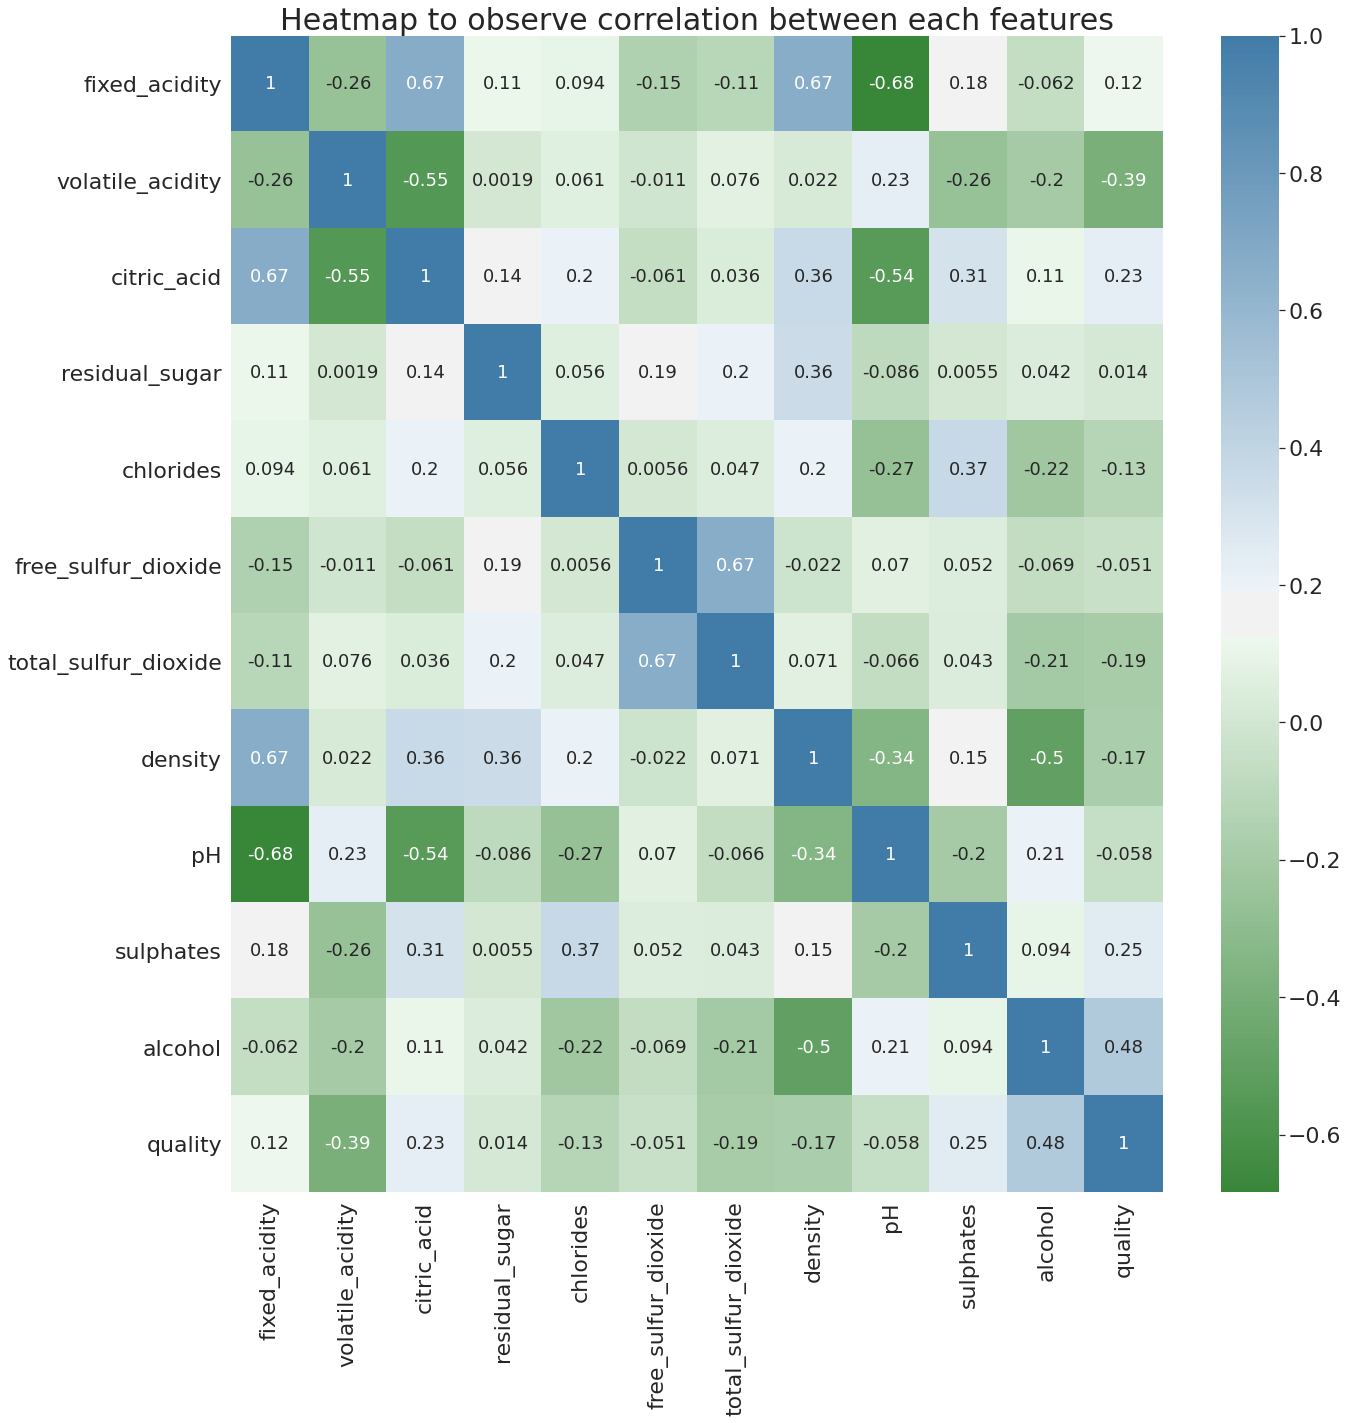

In [24]:
#Correlations of each features of dataset
plt.figure(figsize=(20,20))
sns.set(font_scale=2)

#heat map
ax=sns.heatmap(df.corr(),cmap=sns.diverging_palette(128, 240,as_cmap=True),annot=True, annot_kws={"size":18})

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Heatmap to observe correlation between each features', y=2, fontsize=30)
plt.show()

=> It can be observed that Some of the features are strongly correlated with quality while some of them are not.



- Using *corr()* function we can observe the exact correlation value with each column.
- Using *sort_values()* function we can sort those values in ascending or descending order bypassing the parameter ascending values as True or False

In [25]:
df.corr()["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64

=> From the above fragment of the code and output, it can be inferred that the attribute's alcohol, sulfates, citric_acid, fixed_acidity, and residual_sugar have a maximum correlation with 'quality' attribute.


<h2>Red wine quality count</h2>

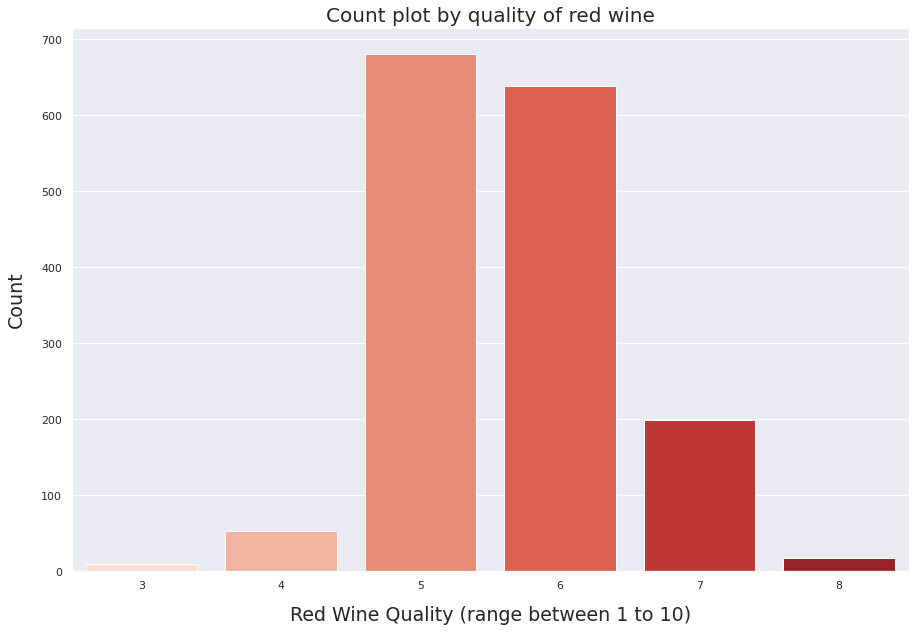

In [26]:
#Count plot to show the quality count
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
sns.set(palette='Reds')
#--------Selected Colour ---------
#col_list = ["bruise", "browny green", "battleship grey","off blue", "manilla","greenish beige"]
#col_list_palette = sns.xkcd_palette(col_list)
#sns.set_palette(col_list_palette)
#---------------------------------
#count plot
ax = sns.countplot(df['quality'])

plt.title("Count plot by quality of red wine", fontsize=20)
plt.xlabel("Red Wine Quality (range between 1 to 10)", labelpad = 15, fontsize=19)
plt.ylabel("Count", labelpad = 15, fontsize=19);
plt.show()

- Another way to visualize the distribution of the 'quality' column

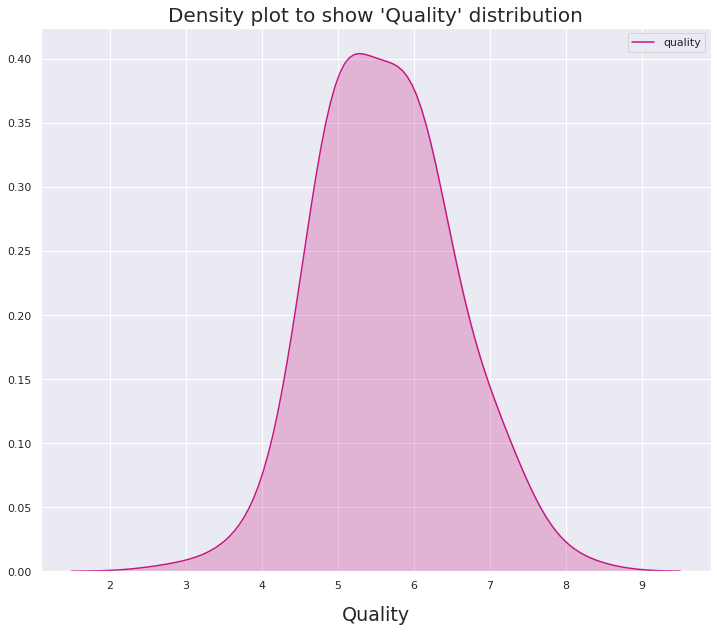

In [27]:
#kdeplot to visualize the distribution of 'quality'
sns.set_style('whitegrid')
plt.figure(figsize=(12,10))
sns.set(style='whitegrid')
sns.set(palette='Set2')

#kdeplot - Kernel Density Estimates
sns.kdeplot(df['quality'], shade=True, bw=.5, color="mediumvioletred")

plt.xlabel("Quality", labelpad = 15, fontsize=19)
plt.title("Density plot to show 'Quality' distribution", fontsize=20)
plt.show()

<p>=> Maximum quality counts are dense around 5 and 6 while quality count 3,4,7 and 8 are very less.</p>


<h2>Alcohol Vs Wine Quality</h2>

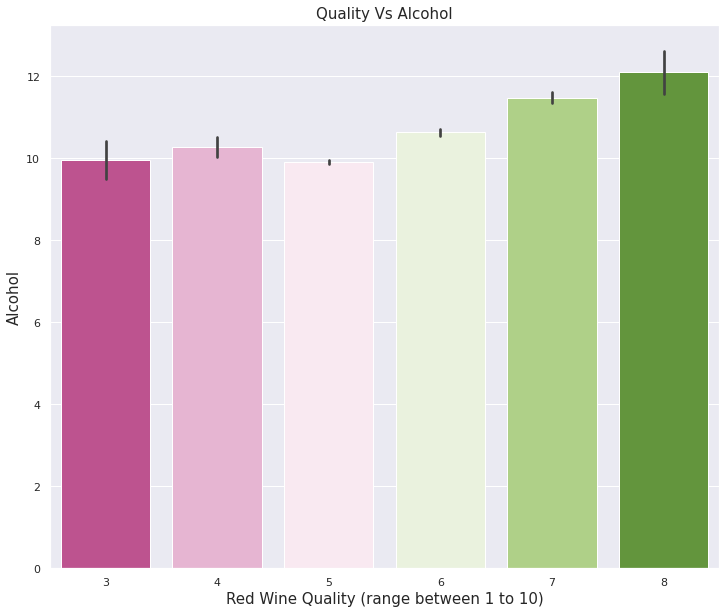

In [28]:
#Alcogol Vs quality barplot
sns.set_style('whitegrid')
plt.figure(figsize=(12,10))
sns.set(style='whitegrid')
sns.set(palette='PiYG')

ax = sns.barplot(x="quality", y="alcohol", data=df)

plt.title('Quality Vs Alcohol',fontsize=15)
plt.xlabel('Red Wine Quality (range between 1 to 10)', fontsize=15)
plt.ylabel('Alcohol', fontsize=15)
plt.show()

<p>=> Wine with the lower than 10% alcohol considered to be a bad wine quality.</p>
<p>=> Wine with higher rating tend to have higher amount of alcohol in it.</p>



<h2>Distplot to show effect of alcohol on red wine reviews</h2>

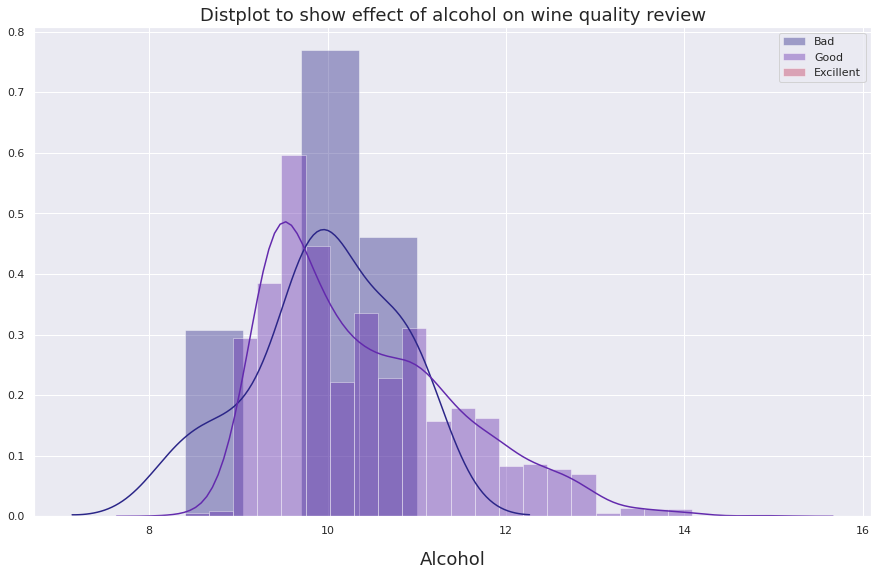

In [29]:
#Selecting data for each distinct plot
data0 = df['alcohol'].loc[df['Red_wine_Reviews']== 'Bad']
data1 = df['alcohol'].loc[df['Red_wine_Reviews']== 'Good']
data2 = df['alcohol'].loc[df['Red_wine_Reviews']== 'Excillent']

sns.set_style('whitegrid')
plt.figure(figsize=(15,9))
sns.set(palette='CMRmap')

ax = sns.distplot(data0, hist=True)
ax = sns.distplot(data1, hist=True)
ax = sns.distplot(data2, hist=True)

plt.title("Distplot to show effect of alcohol on wine quality review", fontsize=18)
plt.xlabel("Alcohol", labelpad = 15, fontsize=18)
plt.legend(['Bad','Good','Excillent'])
plt.show()

<p>=> The amount of alcohol in Bad wine quality has normally distributed from 0 to 12 whereas the good quality of wine contains more alcohol and the data is right-skewed.</p>
<p>=> Superior quality wine data is almost near to 0.</p>

<h2>Alcohol Vs Density</h2>

<Figure size 1080x1008 with 0 Axes>

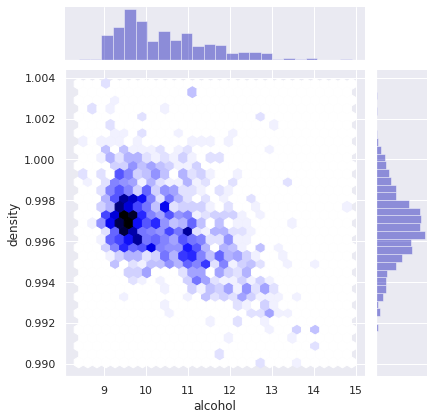

In [30]:
plt.figure(figsize=(15,14))
sns.set(palette='seismic')
sns.jointplot(x=df["alcohol"],y=df["density"], kind="hex")
plt.show()

<p>=> By analysing the above graph it is apparent that the alcohol is denser between 9 and 10 while the density is denser between 1 and 0.996.</p>
<p>=> The density column has equally distributed data while alcohol has right-skewed data.</p>

<h2>Sulphates Vs Reviews</h2>


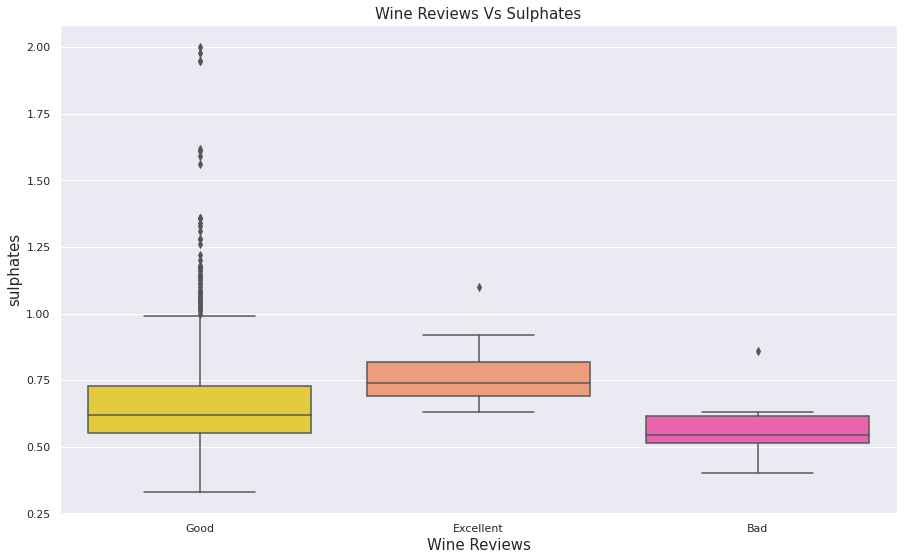

In [31]:
# tried diifetent acidity variable Vs Quality where kind is box
sns.set_style('whitegrid')
plt.figure(figsize=(15,9))
sns.set(style='whitegrid')
sns.set(palette='gnuplot2_r')

ax = sns.boxplot(x="Red_wine_Reviews", y="sulphates", data=df)

plt.title('Wine Reviews Vs Sulphates',fontsize=15)
plt.xlabel('Wine Reviews', fontsize=15)
plt.ylabel('sulphates', fontsize=15)
plt.show()

<p>=> Wine to being a prestigious quality requires an average sulphates level to be around 0.75 grams.</p>
<p>=> The bad wine contains sulphate level approximately below 0.55 grams.</p>
<p>=> The box plot also helps to identify the outliers. </p>

<h2>pH Vs Reviews</h2>

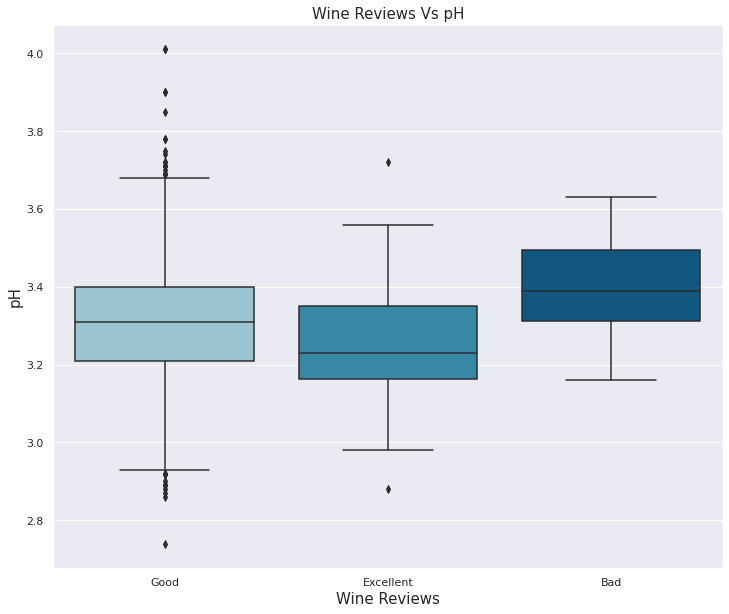

In [32]:
# tried diifetent acidity variable Vs Quality where kind is box
sns.set_style('whitegrid')
plt.figure(figsize=(12,10))
sns.set(style='whitegrid')
sns.set(palette='ocean_r')

ax = sns.boxplot(x="Red_wine_Reviews", y="pH", data=df)

plt.title('Wine Reviews Vs pH',fontsize=15)
plt.xlabel('Wine Reviews', fontsize=15)
plt.ylabel('pH', fontsize=15)
plt.show()

=> The excellent wine contains pH, which is approximately an average of 3.2 grams per decimetre whereas bad wine contains pH approximately 3.4 grams per decider. 



<h2>Citric Acid Vs Reviews </h2>

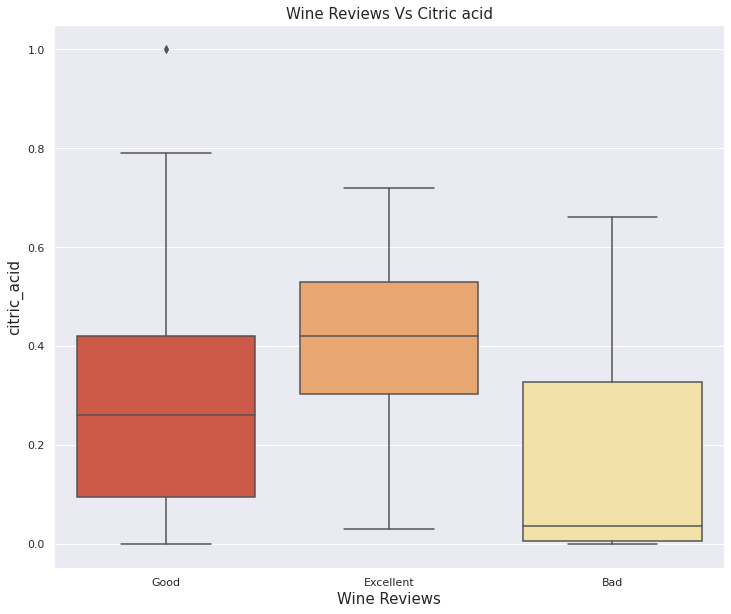

In [33]:
#Citric acid Vs Raiting
sns.set_style('whitegrid')
plt.figure(figsize=(12,10))
sns.set(style='whitegrid')
sns.set(palette='RdYlBu')

ax = sns.boxplot(x="Red_wine_Reviews", y="citric_acid", data=df)

plt.title('Wine Reviews Vs Citric acid',fontsize=15)
plt.xlabel('Wine Reviews', fontsize=15)
plt.ylabel('citric_acid', fontsize=15)
plt.show()


=> In order to be qualifies as better wine, it should have higher amount of citric acid it it.


In [34]:
#Created a new column name 'acid_features' to group the acidic features and visualize the data with 'quality' column
df['acid_factors'] = df[['fixed_acidity', 'volatile_acidity','citric_acid','pH']].mean(axis=1)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Red_wine_Reviews,acid_factors
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Good,2.9025
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Good,2.9700
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Good,2.9650
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Good,3.8000
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Good,2.9025


<h2>Acidity in Wine Vs Quality</h2>

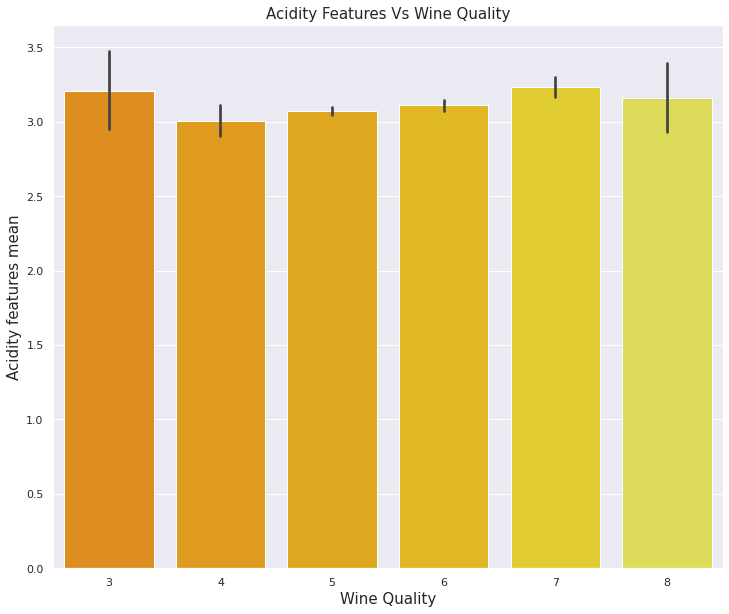

In [35]:
#we want to observe that what is role of acidic factors in good or bad wine
sns.set_style('whitegrid')
plt.figure(figsize=(12,10))
sns.set(style='whitegrid')
sns.set(palette='Wistia_r')

ax = sns.barplot(x="quality", y="acid_factors", data=df)

plt.title('Acidity Features Vs Wine Quality',fontsize=15)
plt.xlabel('Wine Quality', fontsize=15)
plt.ylabel('Acidity features mean', fontsize=15)
plt.show()

=> By analyzing the above graph we can say that almost all kinds of wine have an average of 3 to 3.5 grams per decimetre of acidic content in it. The wine without acidic content is almost impossible to make.


<h2>Residual sugar Vs Red wine reviews</h2>

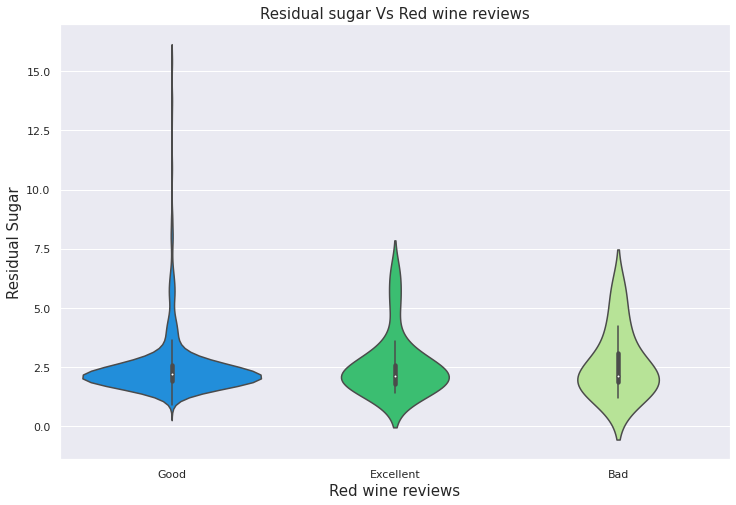

In [36]:
plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')
sns.set(palette='terrain')

sns.violinplot( x=df["Red_wine_Reviews"], y=df["residual_sugar"])

plt.title('Residual sugar Vs Red wine reviews',fontsize=15)
plt.xlabel('Red wine reviews', fontsize=15)
plt.ylabel('Residual Sugar', fontsize=15)
plt.show()

<p>=> It is difficult to find a wine with sugar level less than 1 gram/litter.</p>
<p>=> Wines with greater than 45grams/litter considered to be a sweet wine.</p>
<p>=> From the above observation it is apparent that wine quality does not affect by the sugar level as far as the sugar level is close around 2.5 grams per decimetre.</p>


<h2>Chlorides Vs Quality</h2>

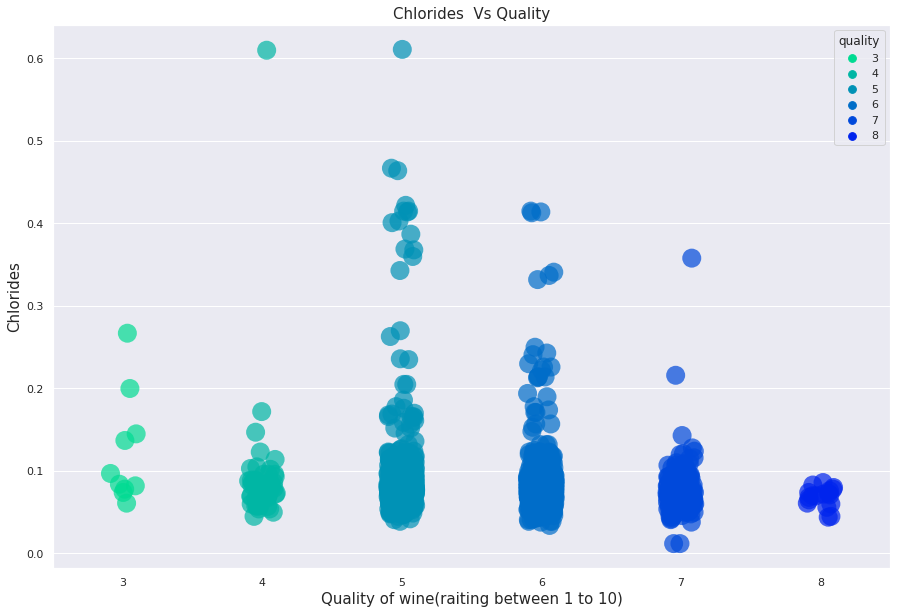

In [37]:
plt.figure(figsize=(15,10))
sns.set(style='whitegrid')
sns.set(palette='winter_r')

sns.stripplot(x = 'quality', y = 'chlorides', data = df, s=19,alpha=0.7, hue = 'quality')
#sns.barplot( x=df["quality"], y=df["chlorides"])

plt.title('Chlorides  Vs Quality',fontsize=15)
plt.xlabel('Quality of wine(raiting between 1 to 10)', fontsize=15)
plt.ylabel('Chlorides', fontsize=15)
plt.show()


=> Chlorides is the amount of salt in the wine. Chlorides and quality appear a negative relationship for red wines. which can be interpreted as not much salt is required for a good quality.

<h2>Toatl sulfur dioxide Vs Reviews</h2>

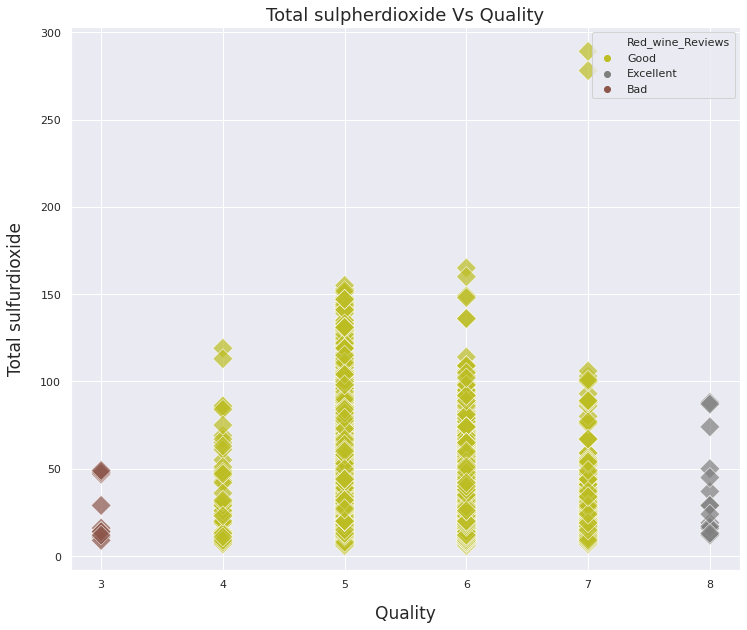

In [38]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,10))
sns.set(style='whitegrid')
sns.set(palette='tab10_r')

sns.scatterplot(x = 'quality', y = 'total_sulfur_dioxide', data = df ,marker='D', s=200, alpha=0.7, hue = 'Red_wine_Reviews')
plt.title("Total sulpherdioxide Vs Quality", fontsize=18)
plt.xlabel("Quality", labelpad = 15, fontsize=17)
plt.ylabel("Total sulfurdioxide", labelpad = 15, fontsize=17);
plt.show()

=> Total sulfur dioxide shows a negative relationship to quality in red wines.

<h2>Pair plot to show the correlation with all attribute</h2>

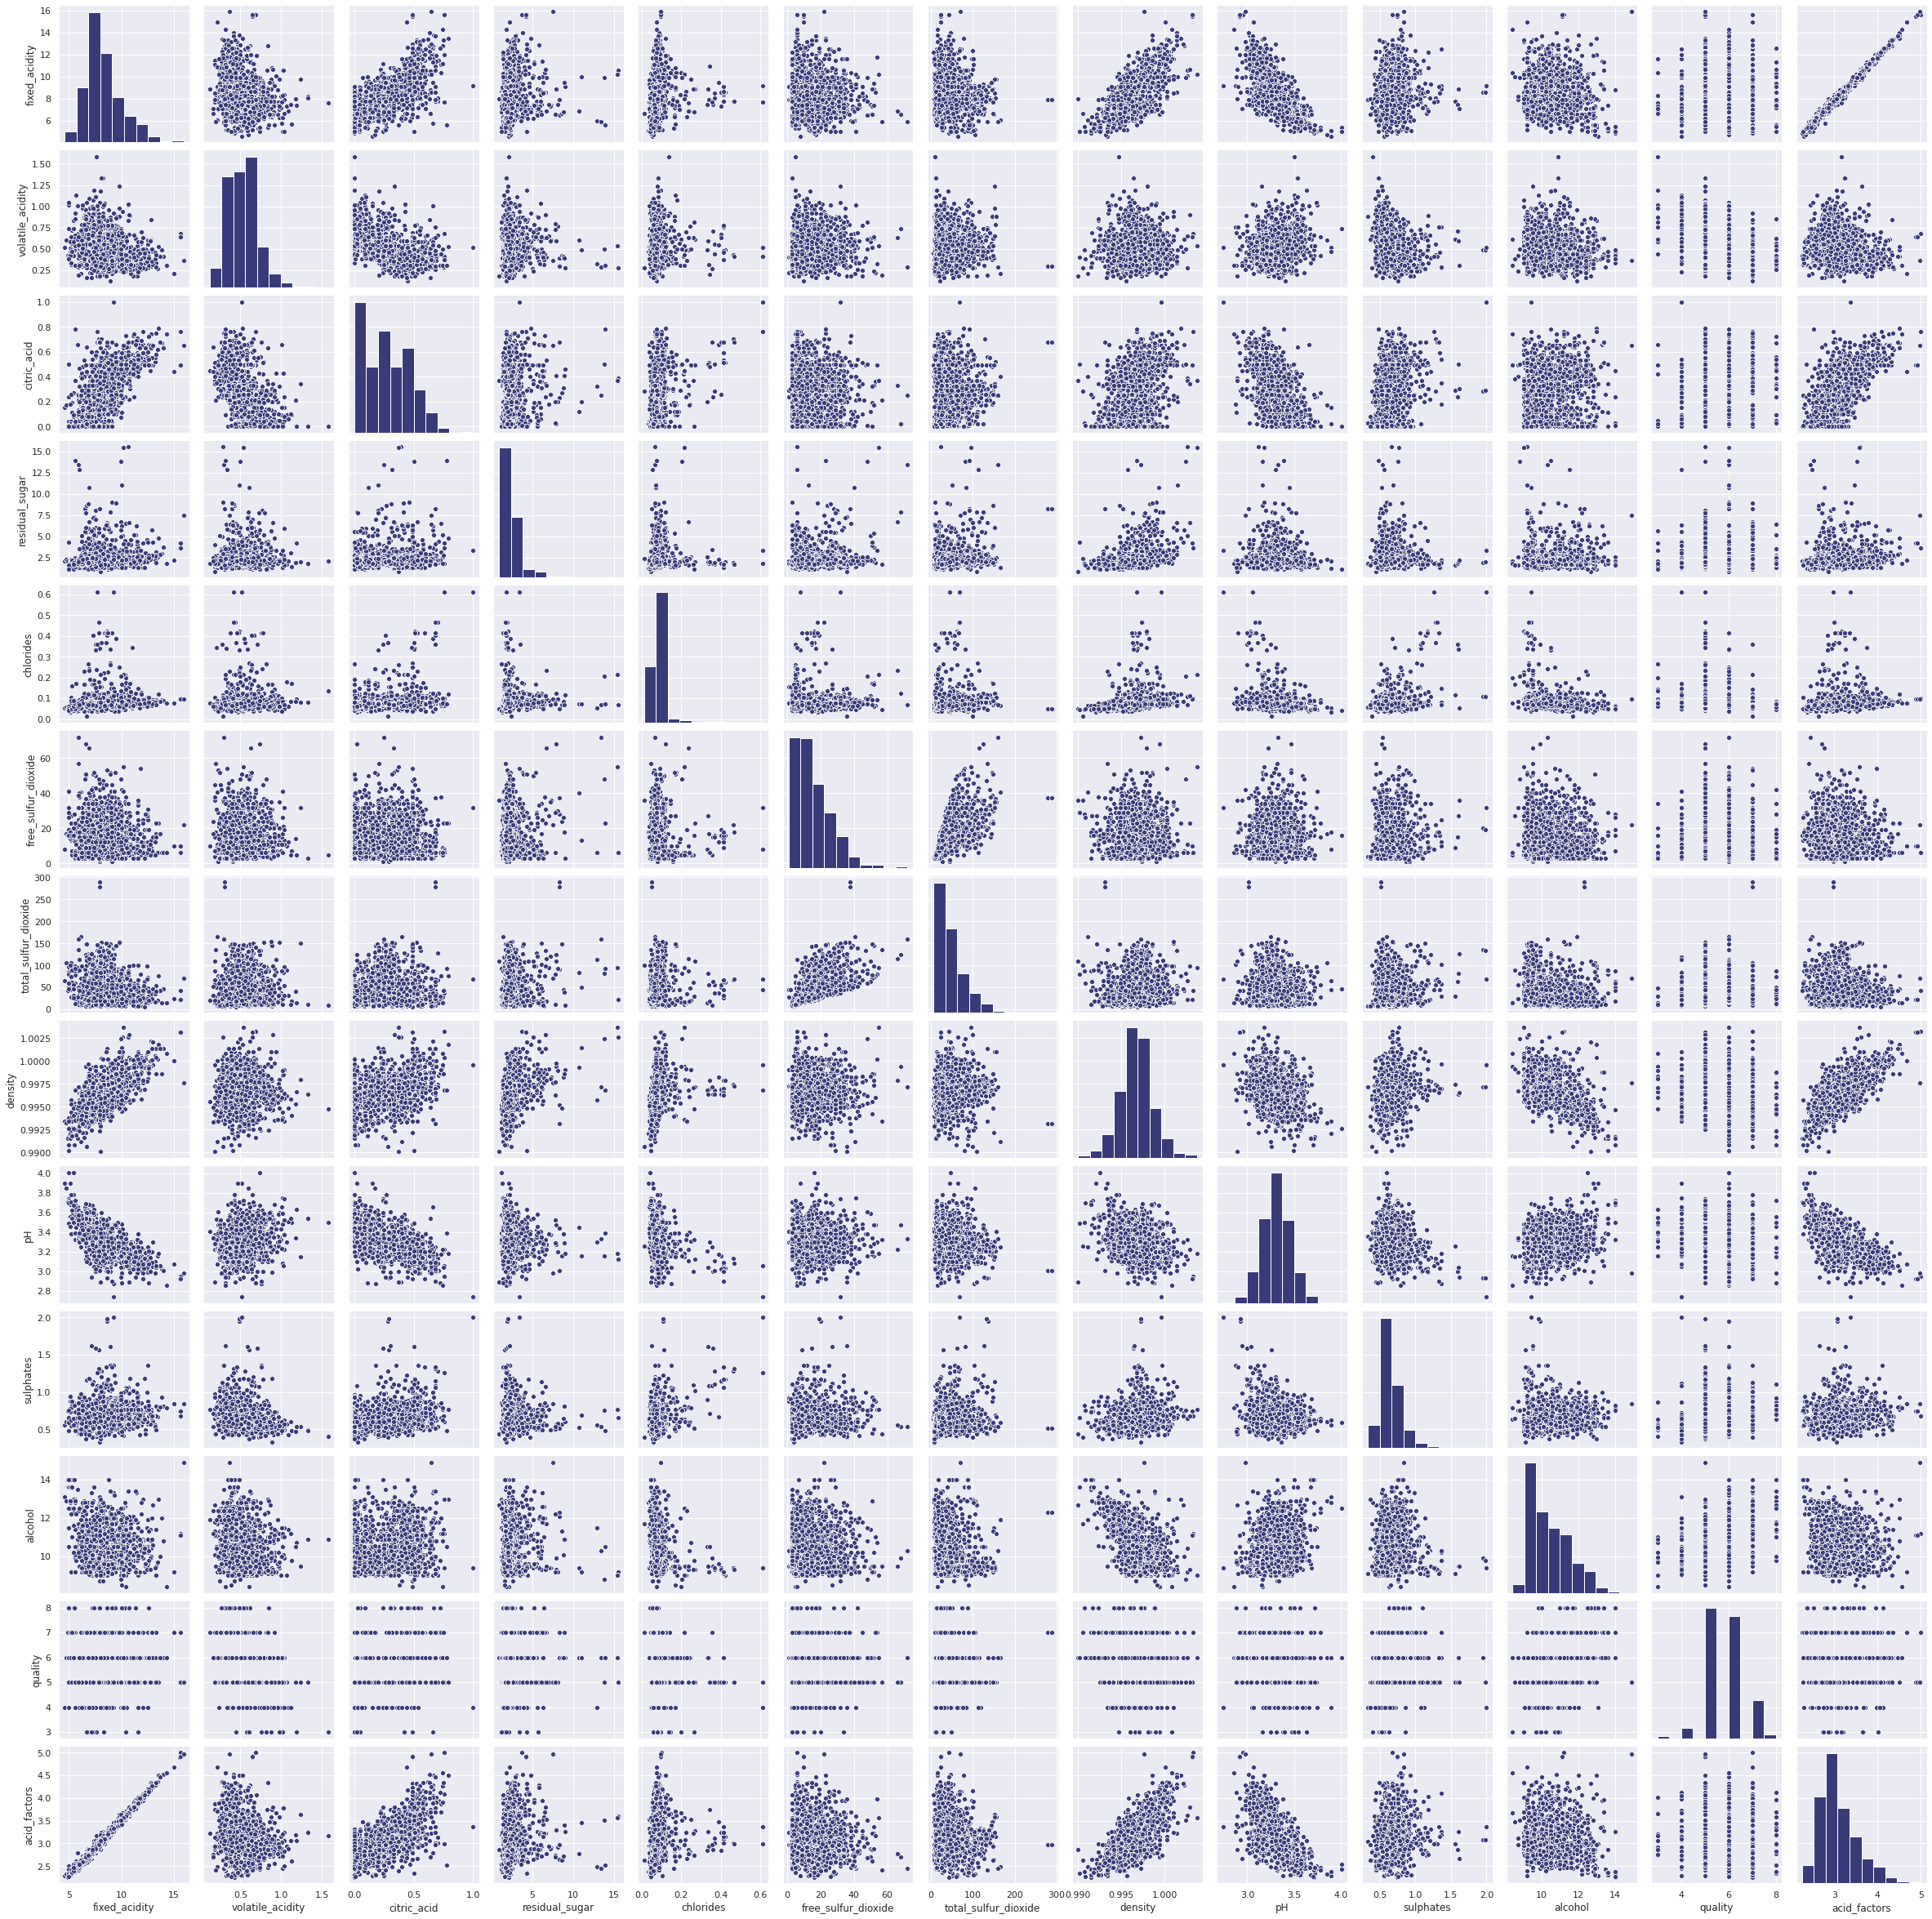

In [39]:
sns.set_style('whitegrid')
sns.set(style='whitegrid')
sns.set(palette='tab20b')
sns.pairplot(df)
plt.show()

=> From above pairplor, it is apparent that the data has many outlers in almost all the columns.

- Before moving further, let's divide the 'quality' into two categories the main idea is to define quality as either good or bad.


In [0]:
#Lets divide quality into two parts 
#quality > 6.5 is good wine(denoted as 1)
#quality < 6.5 is bad wine(denoted as 0)

#quality column astype integer
df["quality"] = df["quality"].astype("int")
#first bins will be 2 to 6.5 will be considered as bad wine
#seconf bins 6.5 to 8 will be considered as good wine
bins = (2, 6.5, 8)
group_names = [0,1]
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [41]:
df["quality"].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [0]:
#df.to_csv('df.csv')

## Remove Outliers

- It’s important to remove outliers since they would most likely affect the performance of machine learning models. 

- In order to find and remove the outliers, I have used z-score.


In [0]:
#droping redundent column which we have created for EDA that is not further useful for analysis
df=df.drop(columns=['Red_wine_Reviews'])

In [0]:
# Convert categorical to integer
df["quality"] = df["quality"].astype(str).astype(int)

In [45]:
#checking datatypes before removing outliers 
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
acid_factors            float64
dtype: object

- Z = (X - μ) / σ 
- It can be observed, subtract the mean of the population and divide it by the standard deviation.

- It represents how many standard deviations away a data point is from the mean. The data points which are too far from the mean are considered as outliers.

- In the most cases threshold for outlier detection is either z-score > 3 or z-score < -3. 
- For this purpose I used zscore() function defined in SciPy library and set the threshold = 3. 

In [46]:
z = np.abs(stats.zscore(df))
print(z)

[[0.52835961 0.96187667 1.39147228 ... 0.96024611 0.39625599 0.47363896]
 [0.29854743 1.96744245 1.39147228 ... 0.58477711 0.39625599 0.31759839]
 [0.29854743 1.29706527 1.18607043 ... 0.58477711 0.39625599 0.32915695]
 ...
 [1.1603431  0.09955388 0.72391627 ... 0.54162988 0.39625599 1.19604901]
 [1.39015528 0.65462046 0.77526673 ... 0.20930812 0.39625599 1.26829002]
 [1.33270223 1.21684919 1.02199944 ... 0.54162988 0.39625599 1.30585534]]


In [0]:
#Setting the threshold for oulier to 3
df_outliers = df[(z<3).all(axis=1)]

In [48]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

fixed_acidity            2.100000
volatile_acidity         0.250000
citric_acid              0.330000
residual_sugar           0.700000
chlorides                0.020000
free_sulfur_dioxide     14.000000
total_sulfur_dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  0.000000
acid_factors             0.527500
dtype: float64


In [49]:
df_outliers.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,acid_factors
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,2.9025
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,2.9700
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,2.9650
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,3.8000
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,2.9025


In [50]:
df_outliers = df_outliers[~((df_outliers < (Q1 - 1.5 * IQR)) | (df_outliers > (Q3 + 1.5 * IQR))).any(axis=1)]
df_outliers.shape                           

(1047, 13)

<h2>Principle Component Analysis (PCA)</h2>

**Need of PCA:** High dimensional data is extremely complex to process due to inconsistence in the features which increases the computation time and make data processing more complex.


**What is PCA?** It's a dimension reduction techniques that enables you to identify the correlations and patterns in a data set so that it can be transformed into a dataset of significantly lower dimensions without loss of any important information.


In [0]:
#seprating out the features
X = df.drop(columns=["quality"]).copy()
#seprating out the target
y = df["quality"].copy()

- I did standardization(also called z-score normalization) for the features because different scales of features may impact the performance of the machine learning models. For this purpose, I used StandardScaler() function defined in Scikit-learn. 

In [0]:
#Srtandarize the feature
sc_x=StandardScaler()
x = sc_x.fit_transform(X)

- PCA projection

In [0]:
#using PCA FROM sklearn
pca = PCA()

In [0]:
#fit and transform the data bypassing all features except target attribute
X_pca = pca.fit_transform(X)

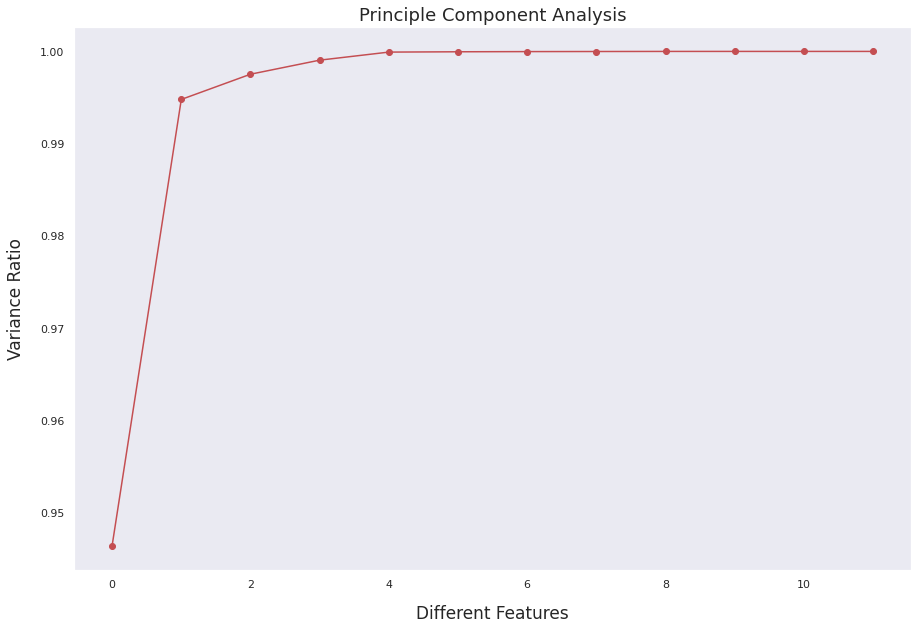

In [55]:
#plot the explained_variance_ratio_

plt.figure(figsize=(15,10))
#explained variance ratio tells us how much information (variance) 
              #can be attributed to each of the principal components
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.title("Principle Component Analysis", fontsize=18)
#PCA1 is X-axis which has 12 features(points on x-axis of plot starting from 0 to 11)
plt.xlabel("Different Features", labelpad = 15, fontsize=17)
#PCA2 is Y-axis which has variance ratio to each of the principal component
plt.ylabel("Variance Ratio", labelpad = 15, fontsize=17);
plt.grid()

=> By analyzing above graph, we can say that the initial 5 features have a high variance rest of the other are the almost same level



In [0]:
#now we will use number of components upto 5 
pca_new = PCA(n_components=5)
#Fit and transorm those five component
x_new = pca_new.fit_transform(X)

In [57]:
#transformed components will be stored to X_pca
X_pca = pca_new.transform(X)

#let's check the shape of X_pca 
print("shape of X_pca", X_pca.shape)

shape of X_pca (1599, 5)


- The below code is written to identify which 5 features the PCA have used when we passed the PCA argument of n_components as 5.

In [0]:
model = PCA(n_components=5).fit(X)
X_pc = model.transform(X)

# number of components
n_pcs= model.components_.shape[0]

# Get the index of the most important feature on EACH component
#List comprehension here
most_important = [np.abs(pca_new.components_[i]).argmax() for i in range(n_pcs)]

#initial feature names are same as our original dataset column names
initial_feature_names = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol']
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

#List comprehension here
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
MY_PCA = pd.DataFrame(dic.items())


In [59]:
MY_PCA.head()

,0,1
0,PC0,total_sulfur_dioxide
1,PC1,free_sulfur_dioxide
2,PC2,fixed_acidity
3,PC3,residual_sugar
4,PC4,alcohol


=> Now,the above list shows the top 5 features with the attribute names.

- In this step of the analysis, I have defined the features to train and test the machine learning model and the target to predict which is ‘quality’.
- To train test split we have used x_new insted of 'X' because x_new varaible contains the vlaue of fit and transform of X(indipendent features) 

- For reference, I have kept this line over here as well
  *  x_new = pca_new.fit_transform(X)
- Next, we split 70% of the data into training set while 30% of the data to test set using below code.
The test_size variable is where we actually specify the proportion of the test set.




In [0]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.3, random_state=42)

<h2>Logistic Regression</h2>

- Instantiate the Logistic Regression model using default and use fit() function to train model.

In [61]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

- We have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score.

In [0]:
y_pred_LR = LR.predict( X_test )

- **Model Evaluation**

In [63]:
#Accuracy score
print('Accuracy Score: {}'.format(accuracy_score(y_test,y_pred_LR)))

Accuracy Score: 0.85625


In [64]:
#Cross validation score
cv_score = cross_val_score(LR,X_test,y_test,cv=5)
print('cross_val_score :',np.average(cv_score))

cross_val_score : 0.8479166666666668


In [65]:
#Mean score of Cross Validation
cv_score_LR = cross_val_score(LR, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_score_LR.mean())

Mean Score of CV:  0.871799623115578


In [66]:
#classification report with precision, recall and f1-score
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       413
           1       0.46      0.18      0.26        67

    accuracy                           0.86       480
   macro avg       0.67      0.57      0.59       480
weighted avg       0.82      0.86      0.83       480



In [67]:
#let us compute the confusion matrix taking parameters test data -
                                                  #of target variable and predicted target data.
confusion_matrix_LR = confusion_matrix(y_test, y_pred_LR)
print(confusion_matrix_LR)

[[399  14]
 [ 55  12]]


ROC score is: 0.5726030862635972


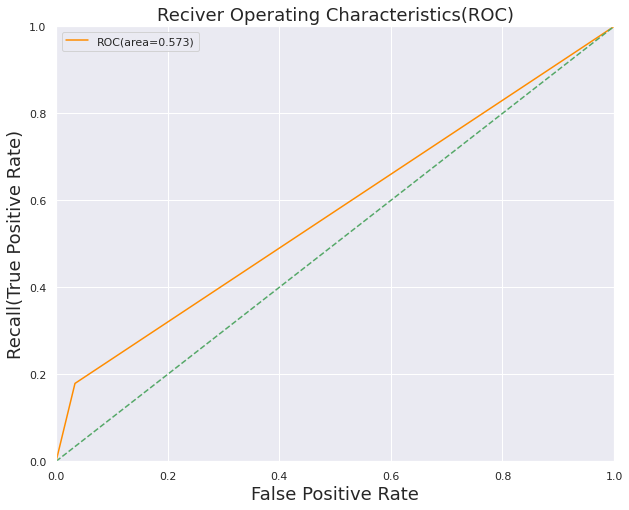

AUC: 0.5726030862635972


In [68]:
#ROC_AUC curve
roc_score = roc_auc_score(y_test,y_pred_LR)
print('ROC score is:',roc_score)
plt.figure(figsize=(10,8))
false_positive_rate, recall, thresholds = roc_curve(y_test,y_pred_LR)
roc_auc = auc(false_positive_rate,recall)
plt.plot(false_positive_rate,recall,'darkorange',label='ROC(area=%0.3f)' %roc_auc)

plt.legend()
plt.plot([0,1],[0,1],'g--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.title('Reciver Operating Characteristics(ROC)', fontsize=18)
plt.ylabel('Recall(True Positive Rate)', fontsize=18 )
plt.xlabel('False Positive Rate',fontsize=18)
plt.show()
print('AUC:',roc_auc)

## Random Forest

In [69]:
# Instantiate model with 50 decision trees
RF = RandomForestClassifier(n_estimators=50)
# Train the model on training data
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
# Use the forest's predict method on the test data
y_pred_RF = RF.predict(X_test)

In [71]:
#Accuracy score
print('Accuracy Score: {}'.format(accuracy_score(y_test,y_pred_RF)))

Accuracy Score: 0.8958333333333334


In [72]:
#Cross validation score
cv_score = cross_val_score(RF,X_test,y_test,cv=5)
print('cross_val_score :',np.average(cv_score))

cross_val_score : 0.8583333333333332


In [73]:
#Mean score of cross validation 
cv_score_RF = cross_val_score(RF, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_score_RF.mean())

Mean Score of CV:  0.8811871859296483


In [74]:
#classification report with precision, recall and f1-score
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       413
           1       0.68      0.48      0.56        67

    accuracy                           0.90       480
   macro avg       0.80      0.72      0.75       480
weighted avg       0.89      0.90      0.89       480



In [75]:
#Confusion matrix
confusion_matrix_RF = confusion_matrix(y_test, y_pred_RF)
print(confusion_matrix_RF)

[[398  15]
 [ 35  32]]


ROC score is: 0.7206461638538543


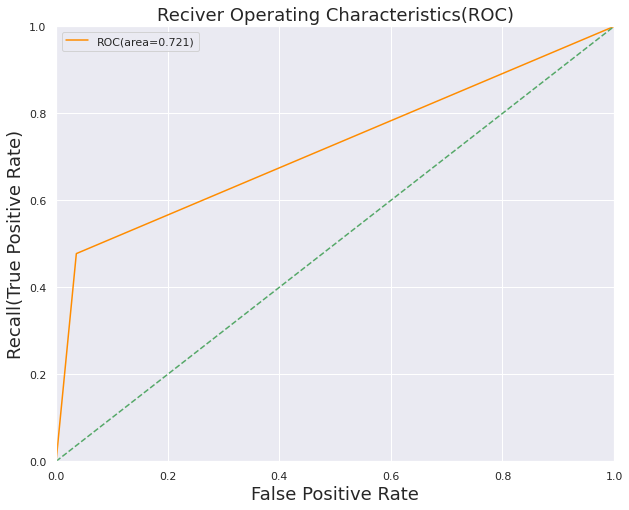

AUC: 0.7206461638538543


In [76]:
#ROC_AUC curve

roc_score = roc_auc_score(y_test,y_pred_RF)
print('ROC score is:',roc_score)
plt.figure(figsize=(10,8))
false_positive_rate, recall, thresholds = roc_curve(y_test,y_pred_RF)
roc_auc = auc(false_positive_rate,recall)
plt.plot(false_positive_rate,recall,'darkorange',label='ROC(area=%0.3f)' %roc_auc)

plt.legend()
plt.plot([0,1],[0,1],'g--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.title('Reciver Operating Characteristics(ROC)', fontsize=18)
plt.ylabel('Recall(True Positive Rate)', fontsize=18 )
plt.xlabel('False Positive Rate',fontsize=18)
plt.show()
print('AUC:',roc_auc)

<h2>Decission Tree</h2>

In [77]:
#Decision tree classifier with max_depth of tree set to be 12 
DT = DecisionTreeClassifier(max_depth = 12)
# Train the model on training data
DT.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
# Use the tree's predict method on the test data
y_pred_DT = DT.predict(X_test)

In [79]:
#Accuracy score
print('Accuracy Score: {}'.format(accuracy_score(y_test,y_pred_DT)))

Accuracy Score: 0.8583333333333333


In [80]:
#Cross validation score
cv_score = cross_val_score(DT,X_test,y_test,cv=5)
print('cross_val_score :',np.average(cv_score))

cross_val_score : 0.8270833333333332


In [81]:
#Mean score of cross validation
cv_score_DT = cross_val_score(DT, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_score_DT.mean())

Mean Score of CV:  0.8336337939698493


In [82]:
#classification report with precision, recall and f1-score
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       413
           1       0.49      0.54      0.51        67

    accuracy                           0.86       480
   macro avg       0.71      0.72      0.72       480
weighted avg       0.86      0.86      0.86       480



In [83]:
#Confusion Matrix
confusion_matrix_DT = confusion_matrix(y_test, y_pred_DT)
print(confusion_matrix_DT)

[[376  37]
 [ 31  36]]


ROC score is: 0.723862527555925


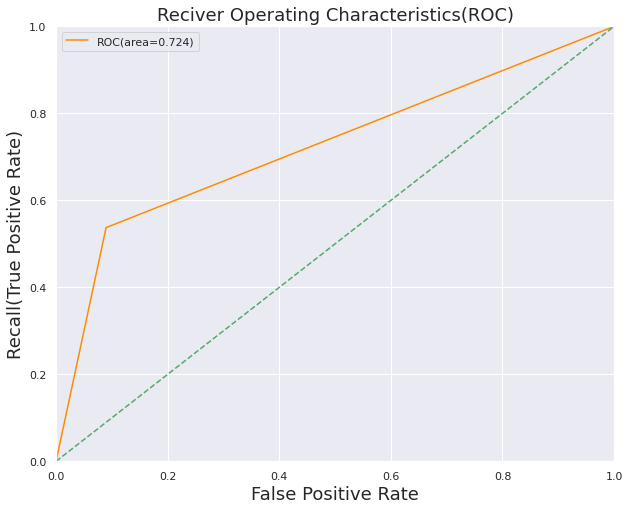

AUC: 0.723862527555925


In [84]:
#ROC_AUC curve

roc_score = roc_auc_score(y_test,y_pred_DT)
print('ROC score is:',roc_score)
plt.figure(figsize=(10,8))
false_positive_rate, recall, thresholds = roc_curve(y_test,y_pred_DT)
roc_auc = auc(false_positive_rate,recall)
plt.plot(false_positive_rate,recall,'darkorange',label='ROC(area=%0.3f)' %roc_auc)

plt.legend()
plt.plot([0,1],[0,1],'g--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.title('Reciver Operating Characteristics(ROC)', fontsize=18)
plt.ylabel('Recall(True Positive Rate)', fontsize=18 )
plt.xlabel('False Positive Rate',fontsize=18)
plt.show()
print('AUC:',roc_auc)

<h2>K-Nearest Neighbor or KNN</h2>

KNN is a supervised algorithm (which means that the training data is labeled)


In [85]:
#We choose n_neighbors = 5, so we will consider the 5 points with minimum distances from the new observation. 
KNN = KNeighborsClassifier(n_neighbors=3)  
# Train the model on training data
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
# Use the knn's predict method on the test data
y_pred_KNN = KNN.predict(X_test)

In [87]:
#Accuracy score
print('Accuracy Score: {}'.format(accuracy_score(y_test,y_pred_KNN)))

Accuracy Score: 0.8416666666666667


In [88]:
#classification report
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       413
           1       0.40      0.25      0.31        67

    accuracy                           0.84       480
   macro avg       0.64      0.60      0.61       480
weighted avg       0.82      0.84      0.83       480



#### Choosing optimum K value

In [0]:
#created blank list name called error
error = []
#calculating the error for different values from 1 to 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

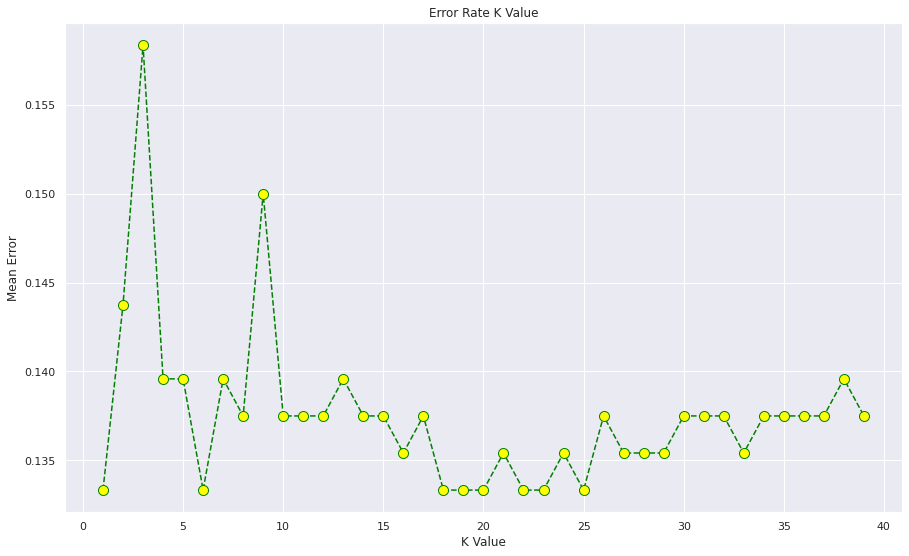

In [90]:
plt.figure(figsize=(15,9))  
plt.plot(range(1, 40), error, color='green', linestyle='dashed', marker='o', markerfacecolor='yellow', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 
plt.show()

=> After ploting the error rate of each k values, we observed that optimum values with lowest error rate are 1,6,18,19,20,22,23 and 25. So for further analysis we will set the k value to be 6.

In [91]:
#We choose n_neighbors = 6, so we will consider the 6 points with minimum distances from the new observation. 
KNN1 = KNeighborsClassifier(n_neighbors=6) 
# Train the model on training data
KNN1.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [0]:
# Use the knn's predict method on the test data
y_pred_KNN1 = KNN1.predict(X_test)

In [93]:
#Accuracy score
print('Accuracy Score: {}'.format(accuracy_score(y_test,y_pred_KNN1)))

Accuracy Score: 0.8666666666666667


In [94]:
#classification report
print(classification_report(y_test, y_pred_KNN1))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       413
           1       0.62      0.12      0.20        67

    accuracy                           0.87       480
   macro avg       0.74      0.55      0.56       480
weighted avg       0.84      0.87      0.83       480



ROC score is: 0.5536482237721801


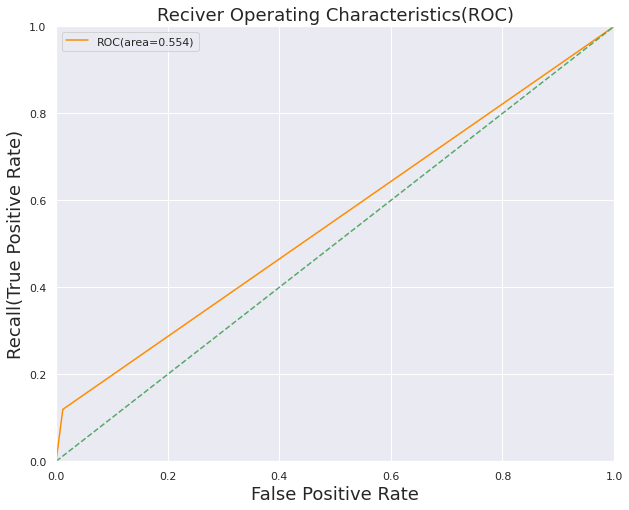

AUC: 0.5536482237721801


In [95]:
#ROC_AUC curve

roc_score = roc_auc_score(y_test,y_pred_KNN1)
print('ROC score is:',roc_score)
plt.figure(figsize=(10,8))
false_positive_rate, recall, thresholds = roc_curve(y_test,y_pred_KNN1)

roc_auc = auc(false_positive_rate,recall)
plt.plot(false_positive_rate,recall,'darkorange',label='ROC(area=%0.3f)' %roc_auc)

plt.legend()
plt.plot([0,1],[0,1],'g--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.title('Reciver Operating Characteristics(ROC)', fontsize=18)
plt.ylabel('Recall(True Positive Rate)', fontsize=18 )
plt.xlabel('False Positive Rate',fontsize=18)
plt.show()
print('AUC:',roc_auc)

<h2>Model Comparison</h2>

In [96]:
comparison_tab = pd.DataFrame({"Model": ["Logitic Regression",
                                "Random Forest", 
                                "Decision Tress",
                                "KNN",
                                "KNN Classifier with optimum k value"],
                                "Accuracy Scores": ["0.86", "0.88", "0.86","0.84","0.87"],
                                "Cross Validation": ["0.85","0.86","0.82","0.00","0.00"],
                                "f1-score(with weighted average)": ["0.83","0.88","0.86","0.83","0.83"],
                                "ROC/AUC": ["0.57", "0.67", "0.72","0.00","0.55"]})

comparison_tab["Model"] = comparison_tab["Model"].astype("category")
comparison_tab["Accuracy Scores"] = comparison_tab["Accuracy Scores"].astype("float32")
comparison_tab["Cross Validation"] = comparison_tab["Cross Validation"].astype("float32")
comparison_tab["f1-score(with weighted average)"] = comparison_tab["f1-score(with weighted average)"].astype("float32")
comparison_tab["ROC/AUC"] = comparison_tab["ROC/AUC"].astype("float32")
pd.pivot_table(comparison_tab, index = ["Model"]).sort_values(by = 'Accuracy Scores', ascending=False)

,Accuracy Scores,Cross Validation,ROC/AUC,f1-score(with weighted average)
Model,,,,
Random Forest,0.88,0.86,0.67,0.88
KNN Classifier with optimum k value,0.87,0.00,0.55,0.83
Decision Tress,0.86,0.82,0.72,0.86
Logitic Regression,0.86,0.85,0.57,0.83
KNN,0.84,0.00,0.00,0.83


=> From above table we can observe that almost all the model are preforming with good by accuracy, but the best model is Random Forest which we will you for predicting the wine quality.
 

<h2>Testing sample data using random forest model</h2>

- I have created an excel file with 5 columns(which we have used during modelling).
- The dummy excel file is generated using function '=INDEX(X1:XN,RANDBETWEEN(x1,xn)' 

In [97]:
# fetching the dummy data from the google sheets to test model
data_path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQdr6IQrzndRQ9uadO4hdkPzgUL0OknqyTs5ddoiyJS4uo-0zOpK38Xoe5MEntiHNSTyosje4cLJz2r/pub?gid=0&single=true&output=csv'
df_dummy_excel = pd.read_csv(data_path)
df_dummy_excel

,fixed_acidity,residual_sugar,free_sulfur_dioxide,total_sulfur_dioxide,alcohol
0,7.3,2.0,17,106,9.5
1,6.7,2.0,8,30,10.5
2,5.6,6.1,8,121,9.2
3,7.5,1.8,9,95,10.5
4,5.6,1.6,50,37,9.3
5,5.6,1.6,11,29,9.3
6,7.4,1.7,13,29,9.3
7,8.9,1.8,22,112,9.2
8,7.9,6.1,17,44,9.0
9,7.6,1.7,28,40,9.3


=> excel file with 5 columns and dummy row of 19 

In [0]:
#Selected all columns except the dependent varaible('quality')
X_dummy = df_dummy_excel
y_dummy_pred = RF.predict(X_dummy)

- To prediction of wine quality here, I have used a model with best accuracy(88%) name Random Forest 

In [99]:
# Showing the data along with the predicted value of quality
prediction_dummy_df = pd.DataFrame(RF.predict(X_dummy), columns = {'Prediction'}).set_index([pd.Index(X_dummy.index)])
probability_dummy_df = pd.DataFrame(RF.predict_proba(X_dummy)).set_index([pd.Index(X_dummy.index)])
all_dummy_df = X_dummy.join(prediction_dummy_df).join(probability_dummy_df)
all_dummy_df

,fixed_acidity,residual_sugar,free_sulfur_dioxide,total_sulfur_dioxide,alcohol,Prediction,0,1
0,7.3,2.0,17,106,9.5,0,0.70,0.30
1,6.7,2.0,8,30,10.5,0,0.70,0.30
2,5.6,6.1,8,121,9.2,0,0.70,0.30
3,7.5,1.8,9,95,10.5,0,0.70,0.30
4,5.6,1.6,50,37,9.3,0,0.70,0.30
5,5.6,1.6,11,29,9.3,0,0.70,0.30
6,7.4,1.7,13,29,9.3,0,0.70,0.30
7,8.9,1.8,22,112,9.2,0,0.70,0.30
8,7.9,6.1,17,44,9.0,0,0.70,0.30
9,7.6,1.7,28,40,9.3,0,0.70,0.30


<p>=> By observing above values we can interpret that for given inputs the quality of wine will be bad.</p>
<p>=> Let's observe more in detail, with low free sulfur dioxide, residual sugar and high alcohol shows that 72% that wine being bad.</p>

In [0]:
#all_dummy_df.to_csv('tested_data_excel.csv')

- Now, before concluding anything further let's consider one single dummy row of data with 5 different values for each attribute. 

In [0]:
# The attribute names are in following sequence,
# 'fixed_acidity', 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'alcohol'	
Xnew = [[7, 2, 9, 18, 12]] #--->> bad wine
#Xnew = [[3.5, 2.5, 9, 52, 12]] #--->> both are equal

In [163]:
#Here, I have used all the models to predict the quality of wine from the given dummy(Xnew) data.  
ynew_LR = LR.predict(Xnew)
ynew_RF = RF.predict(Xnew)
ynew_DT = DT.predict(Xnew)
ynew_KNN1 = KNN1.predict(Xnew) #KNN with optimum K value 

if ynew_LR==0:
    label_LR = 'Bad'
else:
    label_LR = 'Good'

if ynew_RF==0:
    label_RF = 'Bad'
else:
    label_RF = 'Good'

if ynew_DT==0:
    label_DT = 'Bad'
else:
    label_DT = 'Good'

if ynew_KNN1==0:
    label_KNN1 = 'Bad'
else:
    label_KNN1 = 'Good'

print('Result of classification: ')
print(f'Logistic Regression: Label = {ynew_LR} --> {label_LR} wine')
print(f'Random Forest Classifier: Label = {ynew_RF} --> {label_RF} wine')
print(f'Decision Tree: Label = {ynew_DT} --> {label_DT} wine')
print(f'K-Nearest Neighbors Classifier with optimum value: Label = {ynew_KNN1} --> {label_KNN1} wine')



Result of classification: 
Logistic Regression: Label = [1] --> Good wine
Random Forest Classifier: Label = [0] --> Bad wine
Decision Tree: Label = [0] --> Bad wine
K-Nearest Neighbors Classifier with optimum value: Label = [0] --> Bad wine


=> We can observe from above result that While most models seem to agree with Random Forest model prediction, the logistic regression is the only outlier (As can be seen from the above result)
Hence,  we can prove that the wine quality can be predicated accurately by using good accuracy score model (Random Forest)




<h2><b>Implementation of professor's feedback</b></h2>

- We would like to expand our implementation to find out consensus among the models:  
    - If all models agree on the same outcome then that should be the final outcome.
    - If there is a tie then the model with higher accuracy will determine the final outcome.


In [0]:
txt = [label_LR,label_RF,label_DT,label_KNN1] 

In [165]:
txt

['Good', 'Bad', 'Bad', 'Bad']

## **Conditions** 
*  Case 1
  - The count of **bad wine is greater than good wine**, then the *majority* models **predicts quality of wine will be Bad wine**
*  Case 2 
  - The count of **good wine is grater than bad wine**, then the *majority* models **predicts quality of wine will be Good wine**
* Case 3
  - The count of **good wine is equal to count of bad wine**, then the ***model with highest accuracy*** will display with it's prediction(which might be good or bad)

In [166]:
txt = [label_LR,label_RF,label_DT,label_KNN1] 
d = dict(map(lambda x : (x, txt.count(x)), set(txt)))
if d["Bad"] > d["Good"]:
    print("Majority models predicts quality of wine will be "'\033[1m' + 'Bad wine')
elif d["Bad"] < d["Good"]:
    print("Majority models predicts quality of wine will be "'\033[1m' + 'Good wine')
else:
    indices = [i for i, x in enumerate(txt)]
    accuracies = [comparison_tab["Accuracy Scores"].iloc[loc] for loc in indices]
    idx = accuracies.index(max(accuracies))
    print(comparison_tab.iloc[idx].Model)
    print(comparison_tab["Accuracy Scores"].iloc[idx])
    print(txt[idx])

Majority models predicts quality of wine will be Bad wine


<h2>Conclusion</h2>

- In this assignment, I used K-Nearest Neighbours, Logistic Regression with polynomial features, Decision Tree, and Random Forest. With the accuracy score, cross-validation, classification report and ROC/AUC score for each model.

- To speed up a machine learning algorithm, I have used Principal Component Analysis (PCA) since input dimension is too high.

- Even though the quality of a wine is a subjective matter, prediction can still help tremendously to make a better choice. We were able to predict the wine quality using the best model (i.e. random forest), with accuracy score 88%.


<h2>References:</h2>

<p>1] <b>Understanding PCA (Principal Component Analysis) with Python </b></p>
<p>https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21</p>
<p>2] <b>The python graph gallery</b></p>
<p>https://python-graph-gallery.com/110-basic-correlation-matrix-with-seaborn/</p>
<p>3] <b>Styling plots with Seaborn</b></p>
<p>http://jose-coto.com/styling-with-seaborn</p>
<p>4] <b>What is Acidity in Wine?</b></p>
<p>https://www.winemag.com/2019/06/19/what-is-acidity-in-wine/</p>
<p>5] <b>PCA using Python (scikit-learn)</b></p>
<p>https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60</p>
<p>6] <b>Ways to Detect and Remove the Outliers</b></p>
<P>https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba</p>
<p>7] <b>Python Lambda</b></p>
<p>https://www.w3schools.com/python/python_lambda.asp</p>